# Food Demand Forecasting
### Your client is a meal delivery company which operates in multiple cities. They have various fulfilment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.
### Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

### Historical data of demand for a product-center combination (Weeks: 1 to 145), Product (Meal) features such as category, sub-category, current price and discount and Information for fulfilment center like center area, city information etc.


## Loading the datasets

In [2]:
import pandas as pd
import seaborn as sb
from sklearn.metrics import mean_squared_log_error as m
meal_info=pd.read_csv(r"C:\Users\samya\OneDrive\Documents\Food Demand Forecasting\meal_info.csv")
train=pd.read_csv(r"C:\Users\samya\OneDrive\Documents\Food Demand Forecasting\train.csv")
test=pd.read_csv(r"C:\Users\samya\OneDrive\Documents\Food Demand Forecasting\Test_Data_Set-_Food_demand_forecasting.csv")
center_info=pd.read_csv(r"C:\Users\samya\OneDrive\Documents\Food Demand Forecasting\fulfilment_center_info.csv")
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


## Merging the datasets 

In [3]:
train=pd.merge(train,meal_info,on="meal_id")
test=pd.merge(test,meal_info,on="meal_id")

train=pd.merge(train,center_info,on="center_id")
test=pd.merge(test,center_info,on="center_id")

## Encoding the Categorical variables

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train["category"]=le.fit_transform(train["category"])
train["center_type"]=le.fit_transform(train["center_type"])
train["cuisine"]=le.fit_transform(train["cuisine"])
test["category"]=le.fit_transform(test["category"])
test["center_type"]=le.fit_transform(test["center_type"])
test["cuisine"]=le.fit_transform(test["cuisine"])
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,3,647,56,2,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,0,3,647,56,2,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,0,3,647,56,2,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,0,3,647,56,2,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,0,3,647,56,2,2.0


## Checking for missing values

In [5]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [6]:
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

#### There are no missing values in either datasets

## Univariate Analysis

### 'checkout_price'

<AxesSubplot:xlabel='checkout_price'>

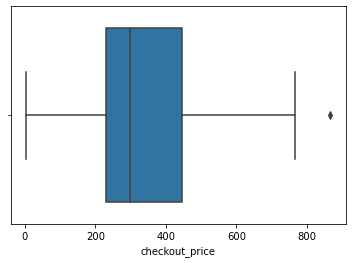

In [7]:
sb.boxplot(x="checkout_price",data=train)

In [8]:
train["checkout_price"].loc[train["checkout_price"]>800]=train["checkout_price"].mean()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='checkout_price'>

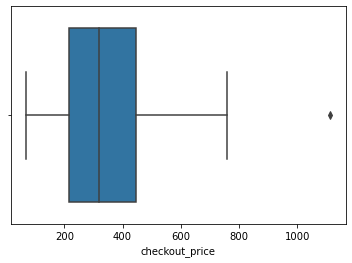

In [9]:
sb.boxplot(x="checkout_price",data=test)

In [10]:
test["checkout_price"].loc[test["checkout_price"]>800]=test["checkout_price"].mean()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### 'base_price'

<AxesSubplot:xlabel='base_price'>

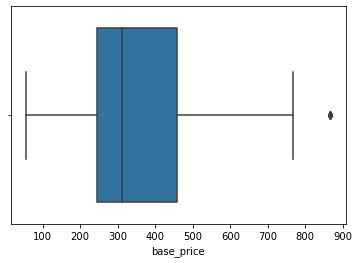

In [11]:
sb.boxplot(x="base_price",data=train)

In [12]:
train["base_price"].loc[train["base_price"]>800]=train["base_price"].mean()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='base_price'>

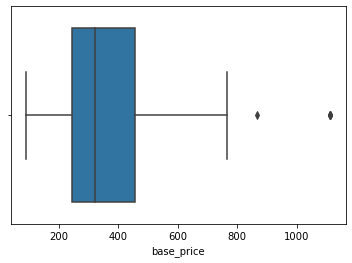

In [13]:
sb.boxplot(x="base_price",data=test)

In [14]:
test["base_price"].loc[test["base_price"]>800]=test["base_price"].mean()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### 'emailer_for_promotion'

In [15]:
train["emailer_for_promotion"].value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

In [16]:
test["emailer_for_promotion"].value_counts()

0    30409
1     2164
Name: emailer_for_promotion, dtype: int64

### 'homepage_featured'

In [17]:
train["homepage_featured"].value_counts()

0    406693
1     49855
Name: homepage_featured, dtype: int64

In [18]:
test["homepage_featured"].value_counts()

0    29923
1     2650
Name: homepage_featured, dtype: int64

### 'category'

<AxesSubplot:xlabel='category', ylabel='count'>

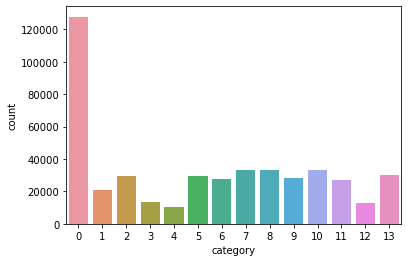

In [19]:
sb.countplot(x="category",data=train)

<AxesSubplot:xlabel='category', ylabel='count'>

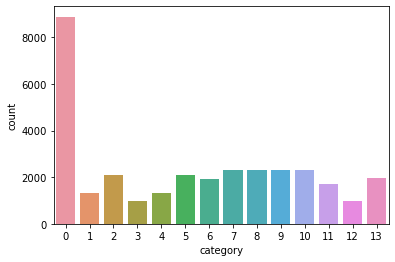

In [20]:
sb.countplot(x="category",data=test)

<AxesSubplot:xlabel='cuisine', ylabel='count'>

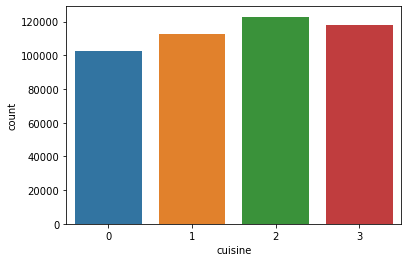

In [21]:
sb.countplot(x="cuisine",data=train)

<AxesSubplot:xlabel='cuisine', ylabel='count'>

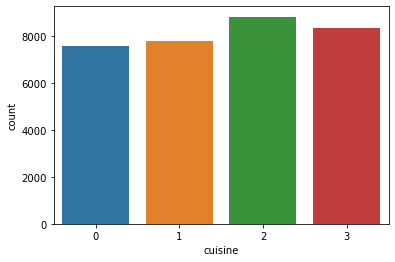

In [22]:
sb.countplot(x="cuisine",data=test)

## Bivariate Analysis
### 'checkout_price' and 'num_orders'

<AxesSubplot:xlabel='num_orders', ylabel='checkout_price'>

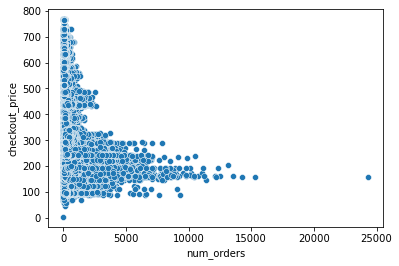

In [23]:
sb.scatterplot(x="num_orders",y="checkout_price",data=train)

### 'base_price' and 'num_orders'

<AxesSubplot:xlabel='num_orders', ylabel='base_price'>

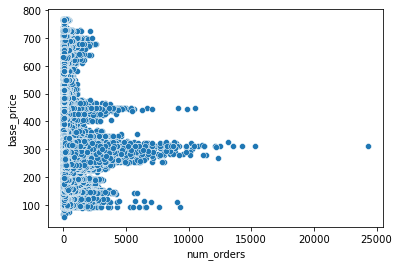

In [24]:
sb.scatterplot(x="num_orders",y="base_price",data=train)

### 'category' and 'num_orders'

<AxesSubplot:xlabel='category', ylabel='num_orders'>

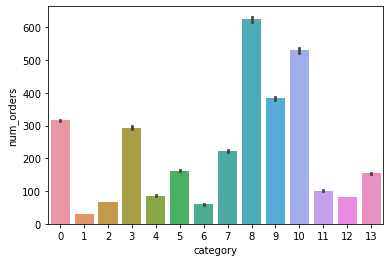

In [25]:
sb.barplot(x="category",y="num_orders",data=train)

### 'cuisine' and 'num_orders'

<AxesSubplot:xlabel='cuisine', ylabel='num_orders'>

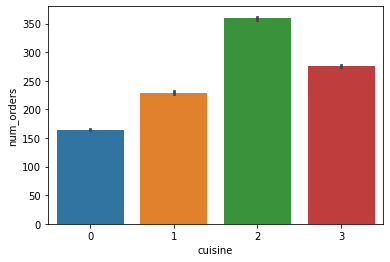

In [26]:
sb.barplot(x="cuisine",y="num_orders",data=train)

## Converting train data into x and y

In [27]:
import numpy as np
x=train.drop(["num_orders"],axis=1)
y=train["num_orders"]

corr_x=x.corr().abs()
upper_x=corr_x.where(np.triu(np.ones(corr_x.shape),k=1).astype(np.bool))
drop_x=[column for column in upper_x.columns if any(upper_x[column]>0.6)]
x=x.drop(x[drop_x],axis=1)

corr_test=test.corr().abs()
upper_test=corr_test.where(np.triu(np.ones(corr_test.shape),k=1).astype(np.bool))
drop_test=[column for column in upper_test.columns if any(upper_test[column]>0.6)]
test=test.drop(test[drop_test],axis=1)

In [28]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.25,random_state=20)

## Scaling the data

In [29]:
from sklearn.preprocessing import MinMaxScaler
ss=MinMaxScaler()

scaled_train_x=ss.fit_transform(train_x)
train_x=pd.DataFrame(scaled_train_x,columns=train_x.columns)

scaled_test_x=ss.fit_transform(test_x)
test_x=pd.DataFrame(scaled_test_x,columns=test_x.columns)

scaled_test=ss.fit_transform(test)
test=pd.DataFrame(scaled_test,columns=test.columns)
train_x.shape,test_x.shape,train_y.shape,test_y.shape,test.shape

((342411, 12), (114137, 12), (342411,), (114137,), (32573, 12))

## Evaluation metric

In [30]:
import numpy as np
def score(true,predicted):
    return 100*np.sqrt(m(true,predicted))

## Model Building

### Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor as DT
dt=DT(max_depth=16)

dt.fit(train_x,train_y)
dt1=dt.predict(test_x)
dt1=pd.DataFrame(dt1,columns=["pred"])
score_dt=score(test_y,dt1)

dt2=dt.predict(test)
pred_dt=pd.DataFrame(dt2,columns=["pred"])
score_dt

67.85870960460667

### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_x,train_y)
lr1=lr.predict(test_x)
lr1=pd.DataFrame(lr1,columns=['pred'])
lr1["pred"]=lr1["pred"].apply(lambda x:0 if x<0 else x)
score_lr=score(test_y,lr1)

lr2=lr.predict(test)
pred_lr=pd.DataFrame(lr2,columns=["pred"])
pred_lr["pred"]=pred_lr["pred"].apply(lambda x:0 if x<0 else x)
score_lr

156.29961969058579

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor as RF
rf=RF()

In [51]:
rf.fit(train_x,train_y)
rf1=rf.predict(test_x)
rf1=pd.DataFrame(rf1,columns=["pred"])
score_rf=score(test_y,rf1)
score_rf

63.35190246709498

In [52]:
rf2=rf.predict(test)
pred_rf=pd.DataFrame(rf2,columns=["pred"])

### XGBM Regressor

In [53]:
! pip install xgboost
from xgboost import XGBRegressor 

In [54]:
xr=XGBRegressor(n_estimators=200,max_depth=20)

xr.fit(train_x,train_y)
xr1=xr.predict(test_x)
xr1=pd.DataFrame(xr1,columns=["pred"])
xr1["pred"]=xr1["pred"].apply(lambda x:0 if x<0 else x)
score_xr=score(test_y,xr1)
score_xr

66.93720890964184

In [55]:
xr2=xr.predict(test)
pred_xr=pd.DataFrame(xr2,columns=["pred"])
pred_xr["pred"]=pred_xr["pred"].apply(lambda x:0 if x<0 else x)

### Ensembling the models

In [58]:
from statistics import mean
final_pred1=np.array([])
for i in range(0,len(test_x)):
    final_pred1=np.append(final_pred1,mean([rf1["pred"][i],rf1["pred"][i],rf1["pred"][i],xr1["pred"][i],xr1["pred"][i],dt1["pred"][i]]))
score_ens=score(test_y,final_pred1)
score_ens

62.09175815945276

In [59]:
final_prediction=np.array([])
for i in range(0,len(test)):
    final_prediction=np.append(final_prediction,mean([pred_rf["pred"][i],pred_rf["pred"][i],pred_rf["pred"][i],pred_xr["pred"][i],pred_xr["pred"][i],pred_dt["pred"][i]]))

In [63]:
final_prediction=pd.DataFrame(final_prediction,columns=["prediction"])
final_prediction.head()

,prediction
0,258.257453
1,222.792579
2,291.231485
3,259.848834
4,248.222949


#### Thus, final_prediction dataframe depicts the final food demand forecasting.